# How COVID has influenced Bike use in the Bay Area
## by Grant Glass

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.


>On Mar 17, 2020 San Francisco enacted a shelter in place, which drastically reduced car traffic in the bay area. I am going to investigate whether or not this caused an increase in ridership.


>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I will merge both January, Februrary, and March's data together. The dataset includes the following features : Trip Duration in seconds , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type , and  Rental Access Method. 

Pulling the data down and looking at it on Excel shows us that

January's Data: 295855 trips
February's Data: 432355 trips
March's Data: 176800 trips

We see that there is a clear downturn in March.
But what can the data tell us about the behaviors of the users of Bay Wheels?

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sb
import os



%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [21]:
# merge all the files together
currentDir = os.getcwd()
path = currentDir+'/data/'
text_files = os.listdir(path)

# loop to get all files together
file_list = []
for text_file in text_files:
    filename = path+text_file
    df = pd.read_csv(filename)
    file_list.append(df)
df_merge = pd.concat(file_list) 
df_merge.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


The error seems to be caused by the blank in the 13th column. We will address that in cleanup. 

In [4]:
df_merge.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
176794,61,2020-04-01 10:42:35,2020-04-01 10:43:37,NaN,NaN,37.848493,-122.265797,NaN,NaN,37.848476,-122.265779,999960,Subscriber,app
176795,78,2020-03-18 17:10:42,2020-03-18 17:12:01,NaN,NaN,37.848499,-122.265794,NaN,NaN,37.848477,-122.265815,999960,Subscriber,app
176796,122,2020-04-01 13:32:28,2020-04-01 13:34:31,NaN,NaN,37.848507,-122.266010,NaN,NaN,37.848485,-122.266063,633095,Subscriber,app
176797,340,2020-04-01 13:07:34,2020-04-01 13:13:14,NaN,NaN,37.848530,-122.266013,NaN,NaN,37.848497,-122.266029,633095,Subscriber,app
176798,333,2020-03-23 16:39:57,2020-03-23 16:45:30,NaN,NaN,37.848625,-122.266660,NaN,NaN,37.848446,-122.266022,633095,Subscriber,app


In [5]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               905007 non-null int64
start_time                 905007 non-null object
end_time                   905007 non-null object
start_station_id           418705 non-null float64
start_station_name         419938 non-null object
start_station_latitude     905007 non-null float64
start_station_longitude    905007 non-null float64
end_station_id             419225 non-null float64
end_station_name           420499 non-null object
end_station_latitude       905007 non-null float64
end_station_longitude      905007 non-null float64
bike_id                    905007 non-null int64
user_type                  905007 non-null object
rental_access_method       617858 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 103.6+ MB


In [6]:
df_merge.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object

### What is the structure of your dataset?

> The dataset is the result of merging 3 files(January, February, March (2020)). It has 14 features and 905,007 rows. 

### What is/are the main feature(s) of interest in your dataset?

> Did Covid19 influence ridership? Are people biking for longer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration, Start Time and Date , End Time and Date.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5,0,u'Duration in seconds')

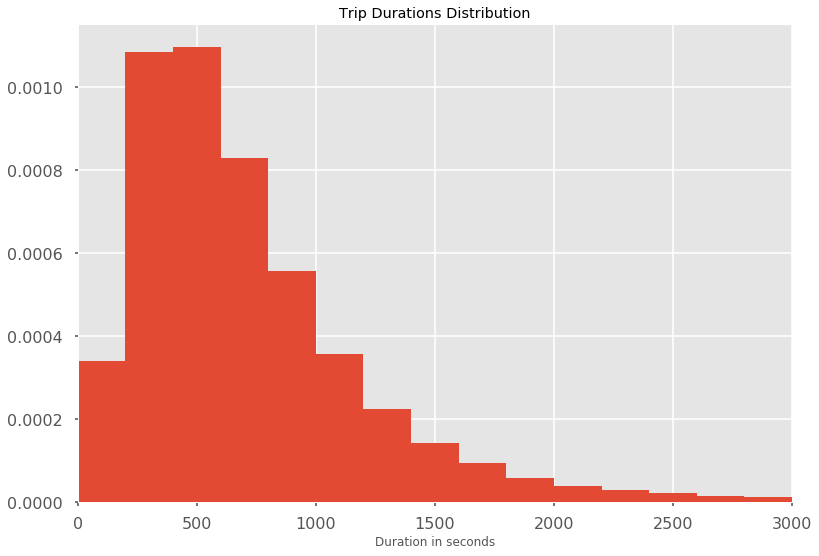

In [7]:
# Look at the average trip length
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
bin_edges = np.arange(0, df_merge['duration_sec'].max() + 200 , 200)
plt.hist(data = df_merge , x = 'duration_sec' , normed=True, bins = bin_edges)
plt.xlim(0,3000)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration in seconds')


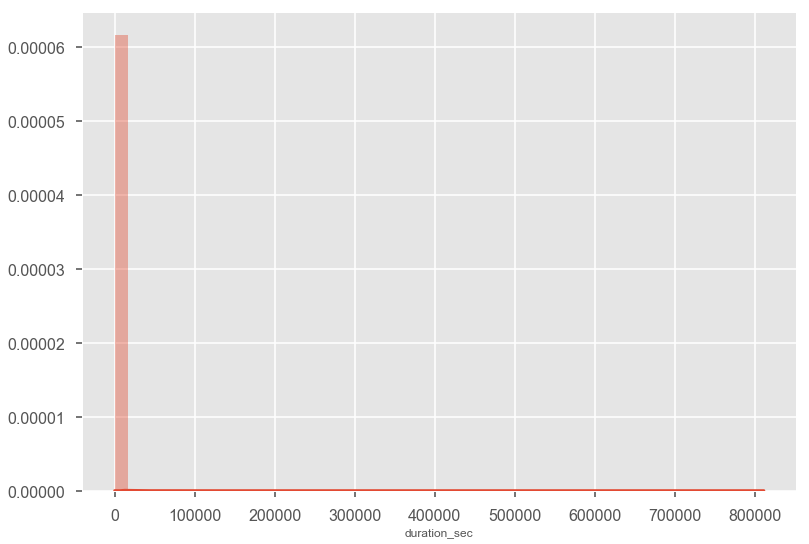

In [137]:
sb.distplot(df_merge.duration_sec.dropna())

In [138]:
df_merge.duration_sec.mean()

806.7834304044057

This graph is a little hard to look at, maybe minutes could create a better looking graph?

In [22]:
df_merge['duration_min'] = df_merge['duration_sec'] / 60
df_merge['duration_min'].value_counts()

7.016667      1152
7.866667      1138
6.783333      1137
6.166667      1129
6.566667      1128
5.916667      1123
5.600000      1121
6.416667      1121
6.733333      1118
5.933333      1115
6.266667      1113
6.350000      1112
6.183333      1112
5.733333      1112
6.050000      1108
5.583333      1108
6.150000      1106
5.883333      1105
6.366667      1104
7.266667      1103
6.083333      1103
5.900000      1103
6.766667      1103
5.950000      1102
6.433333      1101
5.800000      1101
6.300000      1100
6.833333      1096
6.516667      1096
6.900000      1094
              ... 
125.200000       1
99.550000        1
99.950000        1
238.950000       1
80.883333        1
126.850000       1
285.400000       1
75.300000        1
147.083333       1
207.733333       1
95.650000        1
223.816667       1
130.850000       1
184.450000       1
185.550000       1
143.816667       1
142.183333       1
95.183333        1
130.150000       1
136.616667       1
212.216667       1
148.833333  

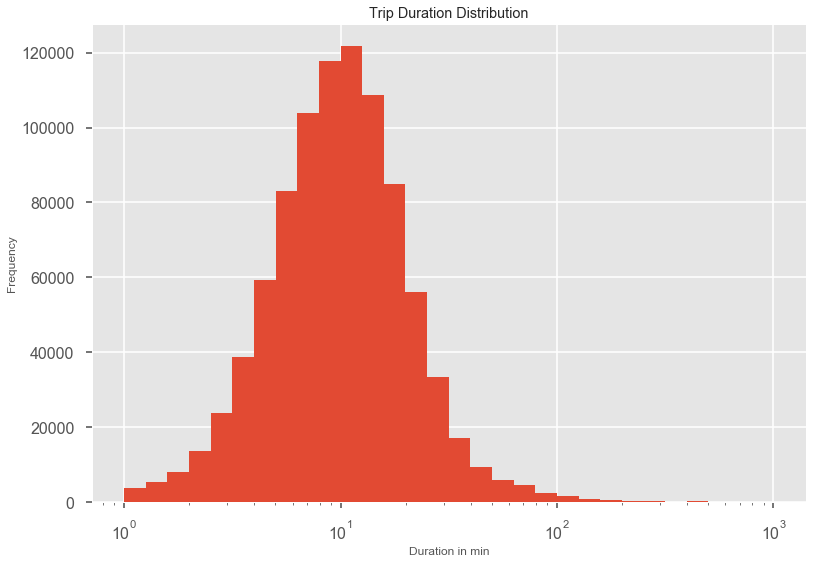

In [140]:
bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_merge , x = 'duration_min' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Duration in min');
plt.xscale('log');
plt.title('Trip Duration Distribution')
plt.ylabel('Frequency');

In [141]:
df_merge.duration_min.mean()

13.44639050674056

This looks much better. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I was interested in time, to see if any changes have occured since COVID19. So it makes sense to see what the distributions of the trips were. The seconds visulaization was hard to read and the mean didn't look quite right. As in the distribution was too diverse. I did some transformations by creating a minute duration instead of the second. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After look at the second, it looks like 1-2 super riders have gone for very long trips, which is influencing the distrobution. I then tried to look at minutes instead of seconds to try to level the scale a little more. This ended up producing a much better looking distribution and mean. 

Lots of short and very long trips. Not many inbetween. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Now let's look at time. First we need to extract the date data from the start_time column.

In [23]:
df_merge['start_time'] = pd.to_datetime(df_merge['start_time'])
df_merge['start_year'] = df_merge['start_time'].dt.year
df_merge['start_month'] = df_merge['start_time'].dt.month
df_merge['start_day'] = df_merge['start_time'].dt.day

In [143]:
df_merge.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                           object
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
rental_access_method               object
duration_min                      float64
start_year                          int64
start_month                         int64
start_day                           int64
dtype: object

In [144]:
#print out csv to move to third party GIS software
df_merge.to_csv('baywheels_covid_gis.csv', encoding='utf-8', index=False)

In [24]:
#create month/day column
df_merge['timing'] = df_merge['start_time'].dt.strftime('%m%d')

In [146]:
df_merge.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_year,start_month,start_day,timing
210892,3251,2020-02-03 08:00:27,2020-02-03 08:54:39,101.0,15th St at Potrero Ave,37.767079,-122.407359,NaN,NaN,37.795254,-122.394187,338400,Subscriber,app,54.183333,2020,2,3,0203
267827,287,2020-02-06 09:36:10,2020-02-06 09:40:57,NaN,NaN,37.776197,-122.393010,NaN,NaN,37.782529,-122.391315,395252,Subscriber,app,4.783333,2020,2,6,0206


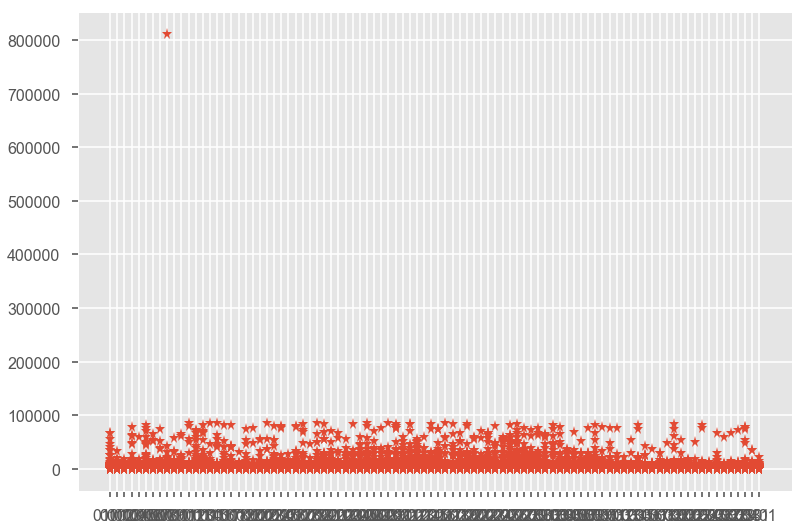

In [147]:
plt.plot(df_merge['timing'], df_merge['duration_sec'], '*')

It looks like that one trip is really throwing us off here. 

In [148]:
df_merge.loc[df_merge['duration_sec'].idxmax()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_year,start_month,start_day,timing
121168,811077,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,37.336035,-121.899836,NaN,NaN,37.336549,-121.900961,231296,Subscriber,clipper,13517.950000,2020,1,9,0109
121168,1373,2020-02-18 16:44:54,2020-02-18 17:07:47,312.0,San Jose Diridon Station,37.329732,-121.901782,NaN,NaN,37.361640,-121.896811,857401,Subscriber,app,22.883333,2020,2,18,0218
121168,345,2020-03-15 17:16:12,2020-03-15 17:21:57,375.0,Grove St at Masonic Ave,37.774836,-122.446546,440.0,Carl St at Cole St,37.765910,-122.449257,156552,Subscriber,app,5.750000,2020,3,15,0315


In [25]:
df_merge = df_merge[df_merge.duration_sec != 811077]

In [26]:
df_merge[df_merge.duration_sec != 811077]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_year,start_month,start_day,timing
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,1385.300000,2020,1,31,0131
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN,1137.316667,2020,1,31,0131
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,923.450000,2020,1,31,0131
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,915.483333,2020,1,31,0131
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,928.333333,2020,1,31,0131
5,11333,2020-01-31 22:48:22.639,2020-02-01 01:57:15.7160,60.0,8th St at Ringold St,37.774520,-122.409449,75.0,Market St at Franklin St,37.773793,-122.421239,12137,Customer,NaN,188.883333,2020,1,31,0131
6,11341,2020-01-31 22:48:12.989,2020-02-01 01:57:14.1650,60.0,8th St at Ringold St,37.774520,-122.409449,75.0,Market St at Franklin St,37.773793,-122.421239,12321,Customer,NaN,189.016667,2020,1,31,0131
7,4038,2020-01-31 23:32:03.907,2020-02-01 00:39:22.0210,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,-122.470651,1589,Customer,NaN,67.300000,2020,1,31,0131
8,4059,2020-01-31 23:31:01.161,2020-02-01 00:38:40.8570,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,-122.470651,12884,Customer,NaN,67.650000,2020,1,31,0131
9,1980,2020-01-31 23:49:09.230,2020-02-01 00:22:09.7540,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,-122.264496,10464,Customer,NaN,33.000000,2020,1,31,0131


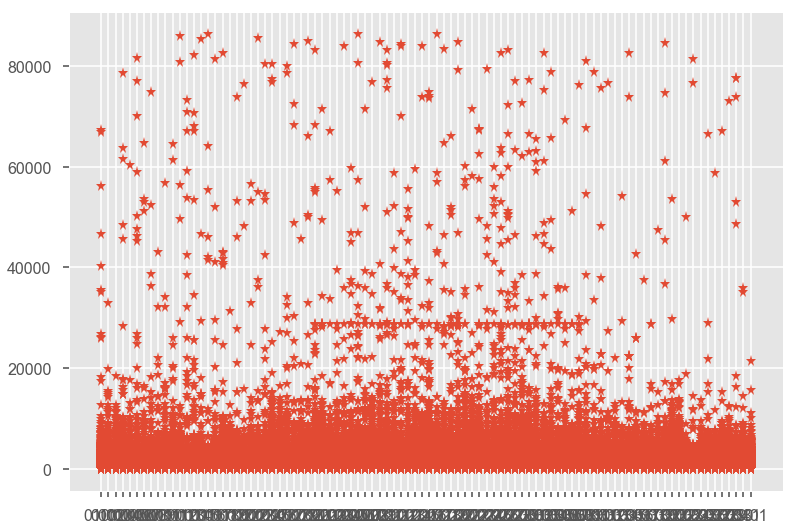

In [151]:
plt.plot(df_merge['timing'], df_merge['duration_sec'], '*')

This looks a little more consistent with scale.

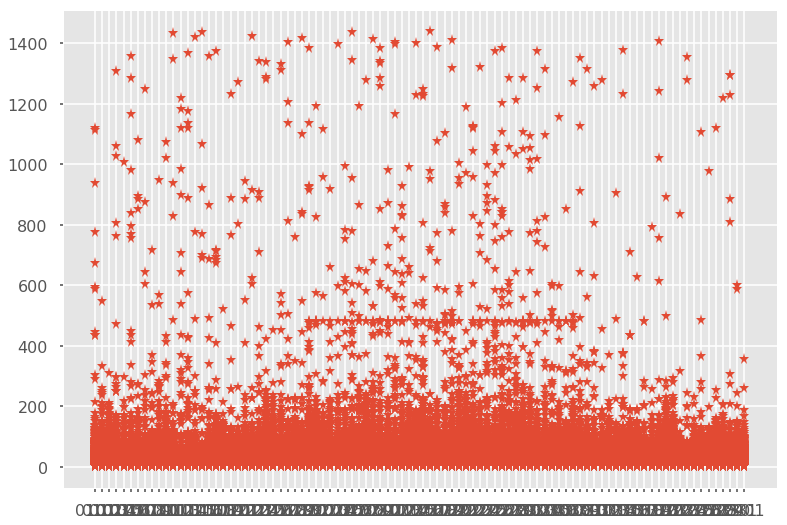

In [10]:
plt.plot(df_merge['timing'], df_merge['duration_min'], '*')

The darkness on the bottom is hard to read. Let's try to get a density plot to have a better idea.

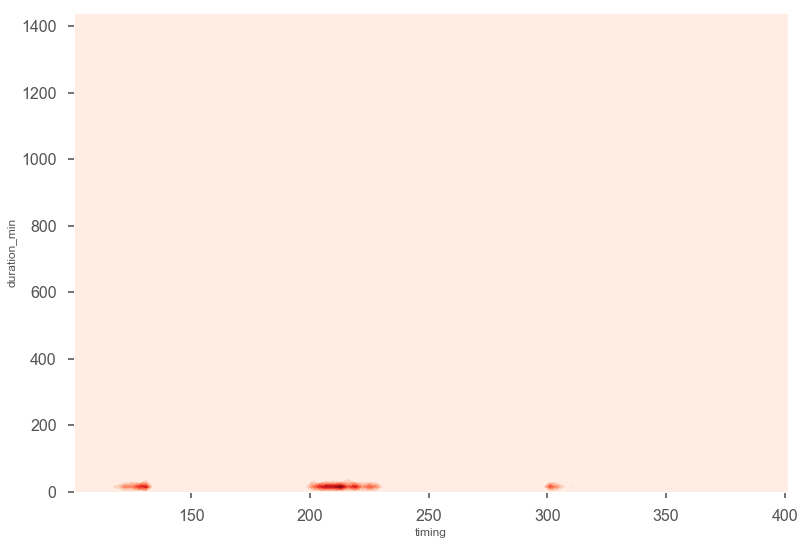

In [153]:
#density plot
sb.kdeplot(df_merge.timing, df_merge.duration_min, cmap="Reds", shade=True, bw=.15)

Ok so there is a clear decrease in March.
Can we visualize this differently?

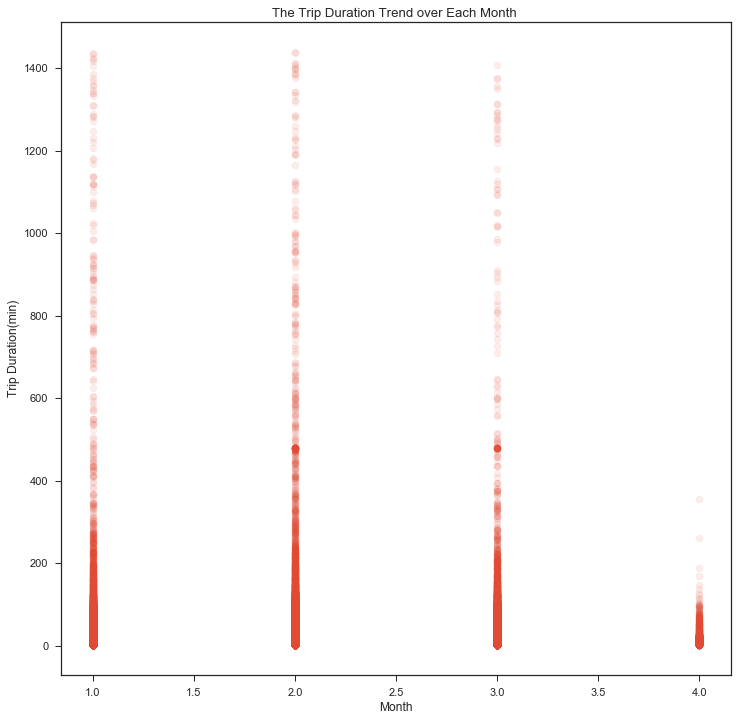

In [126]:
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df_merge , x = 'start_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

we can see a clear dropout of trip durations during COVID.

In [27]:
#from https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [28]:
#use this to calculate distance between start and end points. 
df_merge['distance'] = haversine_np(df_merge['start_station_longitude'],df_merge['start_station_latitude'],df_merge['end_station_longitude'],df_merge['end_station_latitude'])

In [109]:
df_merge['distance'].value_counts()

0.000000    13351
1.010196      967
2.170170      793
1.364479      789
0.709665      771
0.729813      762
1.526942      746
1.358898      646
1.547389      633
1.231893      624
2.074046      599
1.309522      581
0.958359      580
0.673529      573
0.653611      547
1.541740      546
1.463261      533
1.941393      530
1.369875      525
1.003059      516
0.845648      498
1.086754      494
0.897499      484
0.393059      482
1.496210      480
1.127422      480
1.239000      474
1.060577      471
1.858680      470
1.152149      466
            ...  
1.974493        1
0.616972        1
1.383936        1
0.330898        1
3.045516        1
0.047813        1
0.602748        1
2.069375        1
1.981163        1
0.693813        1
5.118452        1
1.254901        1
3.769042        1
1.988946        1
1.926342        1
4.093908        1
0.502258        1
2.060925        1
1.180693        1
1.406844        1
1.742038        1
1.252803        1
2.258501        1
0.935706        1
3.189951  

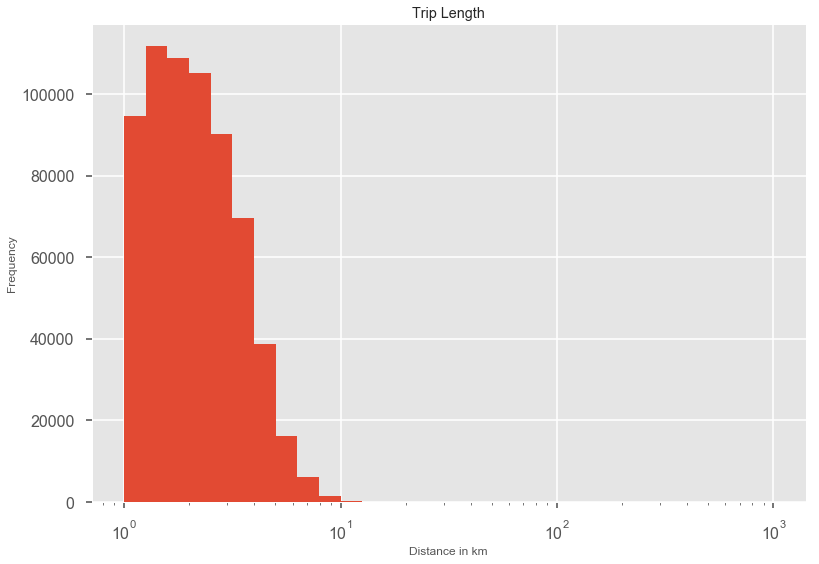

In [110]:
plt.hist(data = df_merge , x = 'distance' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Distance in km');
plt.xscale('log');
plt.title('Trip Length')
plt.ylabel('Frequency');

Text(-4.869,0.5,u'Distance in km')

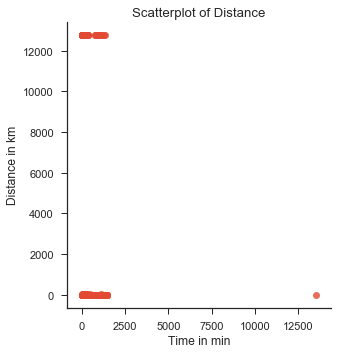

In [112]:
sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('duration_min', 
           'distance', 
           data=df_merge, 
           fit_reg=False) 

# Set title
plt.title('Scatterplot of Distance')

# Set x-axis label
plt.xlabel('Time in min')

# Set y-axis label
plt.ylabel('Distance in km')

In [32]:
df_merge.loc[df_merge['distance'].idxmax()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_year,start_month,start_day,timing,distance
56309,411,2020-01-15 08:15:21.920,2020-01-15 08:22:13.8300,181.0,Grand Ave at Webster St,37.811377,-122.265192,338.0,13th St at Franklin St,37.803189,-122.270579,780,Customer,NaN,6.850000,2020,1,15,0115,1.025441
56309,13378,2020-02-16 16:50:51.408,2020-02-16 20:33:49.4480,485.0,Funston Ave at Fulton St,37.773263,-122.471230,449.0,16th Depot Bike Fleet Station,0.000000,0.000000,9612,Customer,NaN,222.966667,2020,2,16,0216,12791.691538
56309,1117,2020-03-02 17:44:47.553,2020-03-02 18:03:25.1260,126.0,Esprit Park,37.761634,-122.390648,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,1828,Customer,NaN,18.616667,2020,3,2,0302,3.315002


In [33]:
df_merge = df_merge[df_merge.distance != 12791.691538]

In [34]:
df_merge[df_merge.distance != 12791.691538]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_year,start_month,start_day,timing,distance
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,1385.300000,2020,1,31,0131,0.000000
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN,1137.316667,2020,1,31,0131,0.000000
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,923.450000,2020,1,31,0131,0.000000
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,915.483333,2020,1,31,0131,0.000000
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,928.333333,2020,1,31,0131,1.811157
5,11333,2020-01-31 22:48:22.639,2020-02-01 01:57:15.7160,60.0,8th St at Ringold St,37.774520,-122.409449,75.0,Market St at Franklin St,37.773793,-122.421239,12137,Customer,NaN,188.883333,2020,1,31,0131,1.038713
6,11341,2020-01-31 22:48:12.989,2020-02-01 01:57:14.1650,60.0,8th St at Ringold St,37.774520,-122.409449,75.0,Market St at Franklin St,37.773793,-122.421239,12321,Customer,NaN,189.016667,2020,1,31,0131,1.038713
7,4038,2020-01-31 23:32:03.907,2020-02-01 00:39:22.0210,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,-122.470651,1589,Customer,NaN,67.300000,2020,1,31,0131,0.000000
8,4059,2020-01-31 23:31:01.161,2020-02-01 00:38:40.8570,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,-122.470651,12884,Customer,NaN,67.650000,2020,1,31,0131,0.000000
9,1980,2020-01-31 23:49:09.230,2020-02-01 00:22:09.7540,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,-122.264496,10464,Customer,NaN,33.000000,2020,1,31,0131,7.141293


In [29]:
df_merge.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                           object
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
rental_access_method               object
duration_min                      float64
start_year                          int64
start_month                         int64
start_day                           int64
timing                             object
distance                          float64
dtype: object

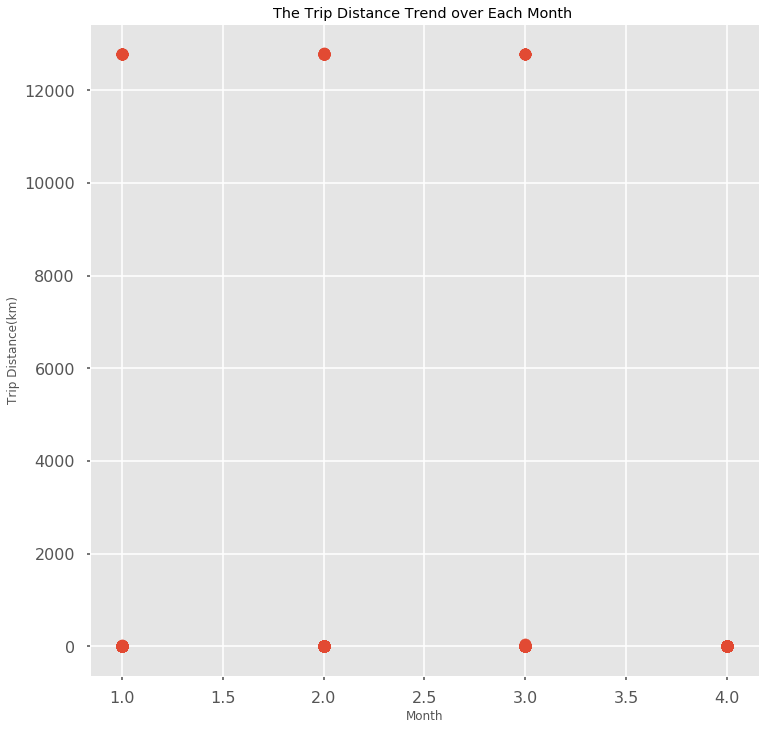

In [36]:
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df_merge , x = 'start_month' , y = 'distance', )
plt.title('The Trip Distance Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Distance(km)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After looking at the distribution of ride duration, I wanted to see how the ride duration changed over the course of the first few months of this year and whether or not COVID have any impact on it. I found that one datapoint was throwing everything off. It was so much longer that it had to be an error (someone forgot to check the bike back in). After taking that off, it looked like the ride duration stayed pretty consistent throughout. By looking at the duration each month, I was able to see that ridership had gone down signifigantly. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Well, I realizes that many riders might return their bikes to the same station that they got them from (essentially going 0 km). Also, it looks like there was an uptick in bikes midway through january, which is puzzling because typically people try to adopt healthy habits in the first of the year, but maybe these people were getting their exercise at a gym instead. 

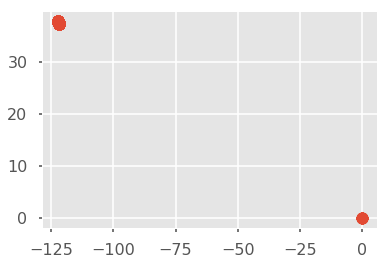

In [91]:
plt.scatter(data = df_merge , x="start_station_longitude", y="start_station_latitude", alpha=0.4)

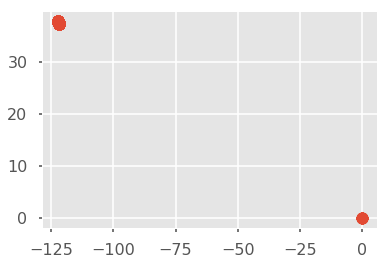

In [92]:
plt.scatter(data = df_merge , x="start_station_longitude", y="start_station_latitude", alpha=0.4)

It looks like many of these trips have the same start and end station. Let's try to eliminate those. 

In [86]:
df_filtered = df_merge[df_merge['start_station_latitude'] == df_merge['end_station_latitude'] ]

In [87]:
df_filtered = df_merge[df_merge['start_station_longitude'] == df_merge['end_station_longitude'] ]

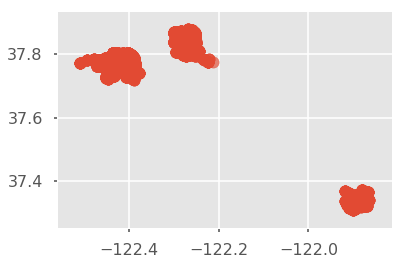

In [93]:
plt.scatter(data = df_filtered , x="start_station_longitude", y="start_station_latitude", alpha=0.4)

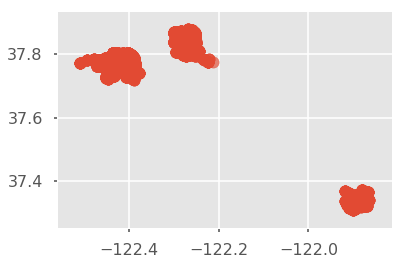

In [94]:
plt.scatter(data = df_filtered , x="start_station_longitude", y="start_station_latitude", alpha=0.4)

In [90]:
len(df_merge[df_merge.distance.isnull()])

0

Ok, so it looks like we have eliminated the trips that just went only to the same station. These are more 1 way trips. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

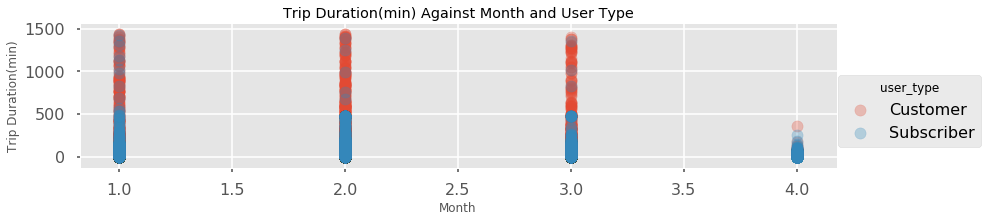

In [76]:
g = sb.FacetGrid(data =  df_merge, hue = 'user_type', aspect=4)
g.map(plt.scatter, 'start_month','duration_min', alpha = .3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

AttributeError: 'str' object has no attribute 'sqrt'

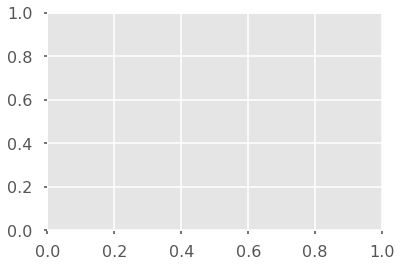

In [95]:
plt.scatter(data = df_filtered, x="start_station_longitude", y="start_station_latitude",
    s=df_filtered['user_type'], label="user_type",
    c="duration_min", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!